## **Latar Belakang**
>
> Industri skincare terus berkembang seiring meningkatnya kesadaran masyarakat akan pentingnya merawat kulit. Sephora, sebagai salah satu platform terbesar untuk produk kecantikan, menawarkan berbagai produk skincare dengan merek, harga, bahan aktif, dan kategori yang berbeda. Salah satu cara untuk menilai kepuasan pelanggan terhadap produk adalah melalui rating yang diberikan oleh pengguna.
>
> Namun, ada banyak faktor yang dapat mempengaruhi rating produk, seperti harga, bahan aktif, merek, kategori produk, dan seberapa populer produk tersebut. Dengan memahami hubungan antara faktor-faktor ini, bisnis dapat meningkatkan kualitas produk dan strategi pemasaran untuk memuaskan pelanggan sekaligus meningkatkan penjualan.

## **Pernyataan Masalah** (*Menggunakan SMART Framework*) 

>**Specific:** Menentukan faktor-faktor utama yang mempengaruhi rating produk skincare di Sephora, seperti harga, bahan aktif, merek, kategori produk, dan popularitas produk.

>**Measurable:** Model regresi akan digunakan untuk memprediksi rating produk berdasarkan faktor-faktor seperti harga, bahan aktif, nama merek, kategori produk, dan popularitas. Evaluasi model akan menggunakan metrik seperti Mean Absolute Error (MAE) dan R-squared (R²).

>**Achievable:** Dataset produk skincare yang tersedia mengandung informasi lengkap tentang produk, seperti rating, harga, bahan aktif, kategori, dan popularitas, yang memungkinkan pembuatan model untuk mempelajari hubungan antara faktor-faktor ini dan rating produk.

>**Relevant:** Hasil model ini penting bagi bisnis untuk memahami faktor-faktor yang mempengaruhi kepuasan pelanggan, yang dapat membantu meningkatkan kualitas produk dan strategi pemasaran, serta mendukung pertumbuhan penjualan.

>**Time-Bound:** Model ini akan diselesaikan dalam waktu kurang dari dua minggu, mencakup eksplorasi data, pembangunan model, dan evaluasi.

## **Model Machine Learning yang Digunakan**

> Untuk memenuhi kebutuhan analisis faktor utama yang memengaruhi rating produk, algoritma Regresi Linier akan digunakan. Model ini dipilih karena kemampuannya dalam memodelkan hubungan antara variabel independen (seperti harga, jumlah ulasan, popularitas) dengan variabel target berupa nilai kontinu (rating produk).

## **Penjabaran Masalah**

> - Apa saja faktor utama yang memengaruhi rating produk skincare di Sephora?
>
> - Seberapa kuat hubungan antara fitur seperti harga, jumlah ulasan, dan bahan aktif dengan rating produk?
>
> - Bagaimana performa model regresi atau klasifikasi dalam memprediksi rating berdasarkan fitur yang tersedia?
>
> - Apakah model dapat memberikan wawasan yang actionable bagi bisnis untuk meningkatkan kualitas produk dan strategi pemasaran?



# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from scipy.stats import spearmanr, kruskal, chi2_contingency
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# **Data Loading**

## ***Mengambil data dari file dataset csv***

**Analisa Awal**

> Dataset ini memberikan wawasan mendalam tentang produk skincare di Sephora, termasuk faktor-faktor seperti harga, rating, popularitas, dan kategori produk

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("product_info.csv")
data.head()


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


| Column               | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `product_id`         | Pengenal unik untuk produk dari situs                                        |
| `product_name`       | Nama lengkap produk                                                          |
| `brand_id`           | Pengenal unik untuk merek produk dari situs                                  |
| `brand_name`         | Nama lengkap merek produk                                                    |
| `loves_count`        | Jumlah orang yang telah menandai produk ini sebagai favorit                  |
| `rating`             | Peringkat rata-rata produk berdasarkan ulasan pengguna                        |
| `reviews`            | Jumlah ulasan pengguna untuk produk tersebut                                 |
| `size`               | Ukuran produk, yang mungkin dalam oz, ml, g, kemasan, atau satuan lainnya   |
| `variation_type`     | Jenis parameter variasi untuk produk (mis. Ukuran, Warna)                    |
| `variation_value`    | Nilai spesifik dari parameter variasi untuk produk                           |
| `variation_desc`     | Deskripsi parameter variasi untuk produk                                     |
| `ingredients`        | Daftar bahan-bahan yang termasuk dalam produk                                |
| `price_usd`          | Harga produk dalam dolar AS                                                  |
| `value_price_usd`    | Potensi penghematan biaya produk, yang disajikan di situs                    |
| `sale_price_usd`     | Harga jual produk dalam dolar AS                                             |
| `limited_edition`    | Menunjukkan apakah produk tersebut merupakan edisi terbatas atau tidak (1-benar, 0-salah) |
| `new`                | Mengindikasikan apakah produk tersebut baru atau tidak (1-benar, 0-salah)   |
| `online_only`        | Mengindikasikan apakah produk tersebut hanya dijual secara online atau tidak (1-benar, 0-salah) |
| `out_of_stock`       | Mengindikasikan apakah produk saat ini sedang kehabisan stok atau tidak (1 jika benar) |
| `sephora_exclusive`  | Menunjukkan apakah produk tersebut eksklusif untuk Sephora atau tidak (1 jika benar) |
| `highlights`         | Daftar tag atau fitur yang menyoroti atribut produk                          |
| `primary_category`   | Kategori pertama di bagian remah roti                                        |
| `secondary_category` | Kategori kedua di bagian remah roti                                          |
| `tertiary_category`  | Kategori ketiga di bagian remah roti                                         |
| `child_count`        | Jumlah variasi produk yang tersedia                                          |
| `child_max_price`    | Harga tertinggi di antara variasi produk                                     |
| `child_min_price`    | Harga terendah di antara variasi produk                                      |


## ***Melihat informasi umum tentang dataset***

**Analisa Awal**

> Ketersediaan Data: Dataset terdiri dari 8.494 entri dengan 27 kolom, tetapi beberapa kolom penting seperti rating, reviews, dan ingredients memiliki missing values yang perlu ditangani.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

## ***Melihat jumlah nilai value yang NaN***

**Analisa Awal**

> Rating dan Reviews: Ada 278 data yang hilang pada kolom rating dan reviews, yang merupakan atribut penting untuk mengevaluasi kepuasan pelanggan. Data ini perlu ditangani karena berkaitan langsung dengan tujuan analisis.

> Kolom-kolom seperti `variation_type`, `variation_value`, dan `variation_desc` menunjukkan banyak data yang hilang, mencerminkan kurangnya variasi produk, sementara kolom `ingredients`, `child_max_price`, `child_min_price`, serta kategori `secondary_category` dan `tertiary_category` juga memiliki data yang hilang, yang bisa memengaruhi analisis faktor bahan aktif, harga variasi produk, dan segmentasi produk berdasarkan kategori.

In [4]:
data.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

## ***Melihat jumlah nilai yang duplicate***

**Analisa Awal**

> tidak ada nilai value duplicated

In [5]:
data.duplicated().sum()

0

## ***Mengubah value nilai kolom menjadi decimal pada kolom `rating` dan `ingredients`***

**Analisa Awal**

> Rating yang sudah dibulatkan memberikan data yang lebih mudah dikelola dan dibandingkan antar produk, yang membantu dalam proses analisis dan pengambilan keputusan bisnis.
>
> Jumlah ingredients yang dihitung mempermudah pengolahan data dan analisis lebih lanjut, serta memungkinkan bisnis untuk mengevaluasi hubungan antara kompleksitas produk (jumlah bahan) dengan kepuasan pelanggan. Hal ini bisa membantu dalam pengembangan produk baru atau pemilihan bahan yang lebih disukai pelanggan.

In [6]:
data['rating'] = data['rating'].round(2)
data['ingredients'] = data['ingredients'].apply(lambda x: len(str(x).split(',')) if isinstance(x, str) else 0)

## ***Melihat korelasi antara kolom dengan target `rating`***

**Analisis Awal**

> Berdasarkan analisis korelasi dan uji Chi-Square pada dataset produk skincare di Sephora, berikut adalah kesimpulan utama:
>
> - Faktor yang Tidak Berpengaruh: Variabel seperti harga, jumlah ulasan, dan bahan aktif tidak memiliki pengaruh signifikan terhadap rating produk. Artinya, faktor-faktor ini tidak secara langsung mempengaruhi kepuasan pelanggan.
>
> - Faktor yang Signifikan: Faktor seperti kategori produk, ukuran, variasi produk, dan fitur produk (highlights) memiliki pengaruh besar terhadap rating. Ini menunjukkan bahwa pelanggan lebih memperhatikan elemen-elemen ini saat memberikan rating.
>
> - Pengaruh Nama dan Deskripsi: Nama produk dan deskripsi variasi tidak berpengaruh besar terhadap rating, jadi mungkin tidak terlalu penting dalam menentukan kepuasan pelanggan.


In [7]:
# Misalkan data_df adalah dataset yang sudah Anda miliki
XNumData = data.select_dtypes(include=['number']).drop(columns=['rating'])  # Fitur numerik
yData = data['rating']  # Target rating

# Menghitung korelasi Pearson untuk fitur numerik dengan target
correlation_matrix = XNumData.copy()
correlation_matrix['rating'] = yData

# Menghitung korelasi Pearson antar fitur
corr = correlation_matrix.corr()

# Menampilkan korelasi yang signifikan
for feature in corr.columns:
    correlation_value = corr.loc[feature, 'rating']
    if abs(correlation_value) > 0.5:  # Menandakan korelasi yang cukup kuat
        if correlation_value > 0:
            print(f"Korelasi Positif yang Signifikan: {feature} -> Korelasi = {correlation_value:.2f}")
        elif correlation_value < 0:
            print(f"Korelasi Negatif yang Signifikan: {feature} -> Korelasi = {correlation_value:.2f}")
    else:
        print(f"Korelasi {feature} dengan Rating: {correlation_value:.2f} (Tidak Signifikan)")

Korelasi brand_id dengan Rating: -0.05 (Tidak Signifikan)
Korelasi loves_count dengan Rating: 0.04 (Tidak Signifikan)
Korelasi reviews dengan Rating: 0.07 (Tidak Signifikan)
Korelasi ingredients dengan Rating: 0.02 (Tidak Signifikan)
Korelasi price_usd dengan Rating: 0.06 (Tidak Signifikan)
Korelasi value_price_usd dengan Rating: 0.11 (Tidak Signifikan)
Korelasi sale_price_usd dengan Rating: 0.10 (Tidak Signifikan)
Korelasi limited_edition dengan Rating: -0.05 (Tidak Signifikan)
Korelasi new dengan Rating: 0.10 (Tidak Signifikan)
Korelasi online_only dengan Rating: -0.02 (Tidak Signifikan)
Korelasi out_of_stock dengan Rating: -0.05 (Tidak Signifikan)
Korelasi sephora_exclusive dengan Rating: 0.02 (Tidak Signifikan)
Korelasi child_count dengan Rating: 0.00 (Tidak Signifikan)
Korelasi child_max_price dengan Rating: 0.11 (Tidak Signifikan)
Korelasi child_min_price dengan Rating: 0.11 (Tidak Signifikan)
Korelasi Positif yang Signifikan: rating -> Korelasi = 1.00


In [8]:
# Menghitung korelasi kategorikal dengan Chi-Square atau Kruskal-Wallis
def calculate_categorical_correlation_with_rating(XCatData, yData):
    correlations = []
    # Pastikan ukuran data sama
    XCatData = XCatData.reset_index(drop=True)
    yData = yData.reset_index(drop=True)

    for col in XCatData.columns:
        # Menggunakan Chi-Square untuk data kategorikal
        contingency_table = pd.crosstab(XCatData[col], yData)
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        correlations.append({'Feature': col, 'Chi-Square Statistic': chi2_stat, 'P-value': p_value})

    return pd.DataFrame(correlations)

XCatData = data.select_dtypes(include=['object'])  

categorical_correlations_df = calculate_categorical_correlation_with_rating(XCatData, yData)

categorical_correlations_df['Significance'] = categorical_correlations_df['P-value'].apply(lambda p: 'Signifikan' if p < 0.05 else 'Tidak Signifikan')

print("\nKorelasi Kategorikal:")
print(categorical_correlations_df)



Korelasi Kategorikal:
               Feature  Chi-Square Statistic       P-value      Significance
0           product_id          2.242968e+06  4.485948e-01  Tidak Signifikan
1         product_name          2.220791e+06  9.673492e-01  Tidak Signifikan
2           brand_name          9.001211e+04  8.689283e-79        Signifikan
3                 size          5.810201e+05  0.000000e+00        Signifikan
4       variation_type          1.989538e+03  3.080612e-14        Signifikan
5      variation_value          7.486454e+05  0.000000e+00        Signifikan
6       variation_desc          1.796480e+05  1.000000e+00  Tidak Signifikan
7           highlights          1.111599e+06  2.807503e-29        Signifikan
8     primary_category          2.507936e+03  1.379183e-06        Signifikan
9   secondary_category          1.387808e+04  2.411629e-76        Signifikan
10   tertiary_category          4.515489e+04  0.000000e+00        Signifikan


## ***Menghapus kolom yang tidak di butuhkan***

> Setelah melakukan analisis korelasi, ditemukan bahwa beberapa kolom tidak menunjukkan hubungan yang signifikan dengan target. Selain itu, kolom-kolom tersebut juga memiliki tingkat missing value yang tinggi, yang dapat mempengaruhi kualitas model. Oleh karena itu, untuk meningkatkan efisiensi dan kualitas data yang digunakan dalam model, kolom-kolom tersebut akan dihapus dari dataset.

In [9]:
columns_to_drop = ['value_price_usd', 'variation_desc', 'sale_price_usd', 'child_max_price', 
                    'child_min_price', 'highlights', 'variation_value', 'variation_type', 
                    'size', 'product_id', 'brand_id', 'product_name', 'secondary_category', 
                    'tertiary_category', 'brand_name']

data = data.drop(columns=columns_to_drop)

## ***Statistik Deskriptif***

**Analisa Awal**

> - Rating Produk: Rating produk rata-rata sekitar 4,19 dengan standar deviasi 0,52. Ini menunjukkan bahwa mayoritas produk mendapatkan rating yang cukup positif, meskipun ada variasi yang cukup besar di antara produk-produk tersebut.
>
> - Jumlah Ulasan: Rata-rata jumlah ulasan per produk adalah 448, dengan beberapa produk memiliki ribuan ulasan (hingga 21.281). Produk dengan jumlah ulasan tinggi cenderung lebih populer dan mungkin memberikan dampak terhadap rating.
>
> - Harga: Harga produk berkisar antara 3 USD hingga 1900 USD, dengan harga rata-rata sekitar 51,66 USD. Variasi harga yang besar menunjukkan adanya produk dengan berbagai tingkat harga, yang bisa mempengaruhi persepsi pelanggan terhadap kualitas.
>
> - Faktor Keterbatasan & Eksklusivitas: Sebagian besar produk tidak terbatas (hanya 7% yang terbatas) dan sebagian besar tidak eksklusif di Sephora (sekitar 72% produk). Namun, produk yang eksklusif mungkin memiliki rating yang lebih tinggi karena dianggap lebih unik atau premium.
>
> - Keterkaitan antara Fitur dan Rating: Berdasarkan statistik ini, faktor seperti harga, jumlah ulasan, dan apakah produk terbatas atau eksklusif mungkin memiliki pengaruh terhadap rating. Produk dengan lebih banyak ulasan dan harga yang lebih tinggi cenderung mendapatkan rating yang lebih baik.
>
> - Analisis ini memberikan gambaran penting bagi bisnis untuk memahami hubungan antara berbagai fitur produk dan rating yang diberikan oleh pelanggan, yang dapat membantu merumuskan strategi pemasaran yang lebih efektif.

In [10]:
data.describe()

,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count
count,8.494000e+03,8216.000000,8216.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000
mean,2.917957e+04,4.194514,448.545521,31.387685,51.655595,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622
std,6.609212e+04,0.516697,1101.982529,34.262904,53.669234,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470
min,0.000000e+00,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.758000e+03,3.980000,26.000000,15.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.880000e+03,4.290000,122.000000,25.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.684125e+04,4.530000,418.000000,38.000000,58.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.401068e+06,5.000000,21281.000000,720.000000,1900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000


# **EDA**

In [11]:
columns_to_plot = ['rating', 'loves_count', 'reviews', 'ingredients', 'price_usd', 'limited_edition', 
                    'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count']

## ***Distribusi fitur numeric***

**Analisis Awal**

> Rating: Mayoritas produk memiliki rating tinggi, dengan sedikit produk yang memiliki rating rendah. Ini menunjukkan bahwa sebagian besar produk mendapatkan ulasan positif.

> Loves Count: Jumlah loves cenderung lebih rendah, tetapi ada beberapa produk dengan jumlah loves yang sangat tinggi, menandakan bahwa produk populer mendapatkan banyak perhatian.

> Jumlah Reviews: Sebagian besar produk memiliki sedikit ulasan, namun ada beberapa produk dengan banyak ulasan, yang menunjukkan bahwa produk populer mendapat perhatian lebih.

> Jumlah Ingredients: Terdapat variasi jumlah bahan dalam produk, menunjukkan keberagaman dalam komposisi produk skincare.
Harga (Price USD): Harga produk bervariasi, dengan beberapa produk murah dan lainnya mahal, yang mencerminkan variasi dalam strategi harga.

> Fitur Kategorikal: Sebagian besar produk bukan edisi terbatas, bukan produk baru, tidak hanya tersedia online, tidak kehabisan stok, dan tidak eksklusif untuk Sephora, menunjukkan dominasi produk yang lebih umum dan tersedia secara luas.

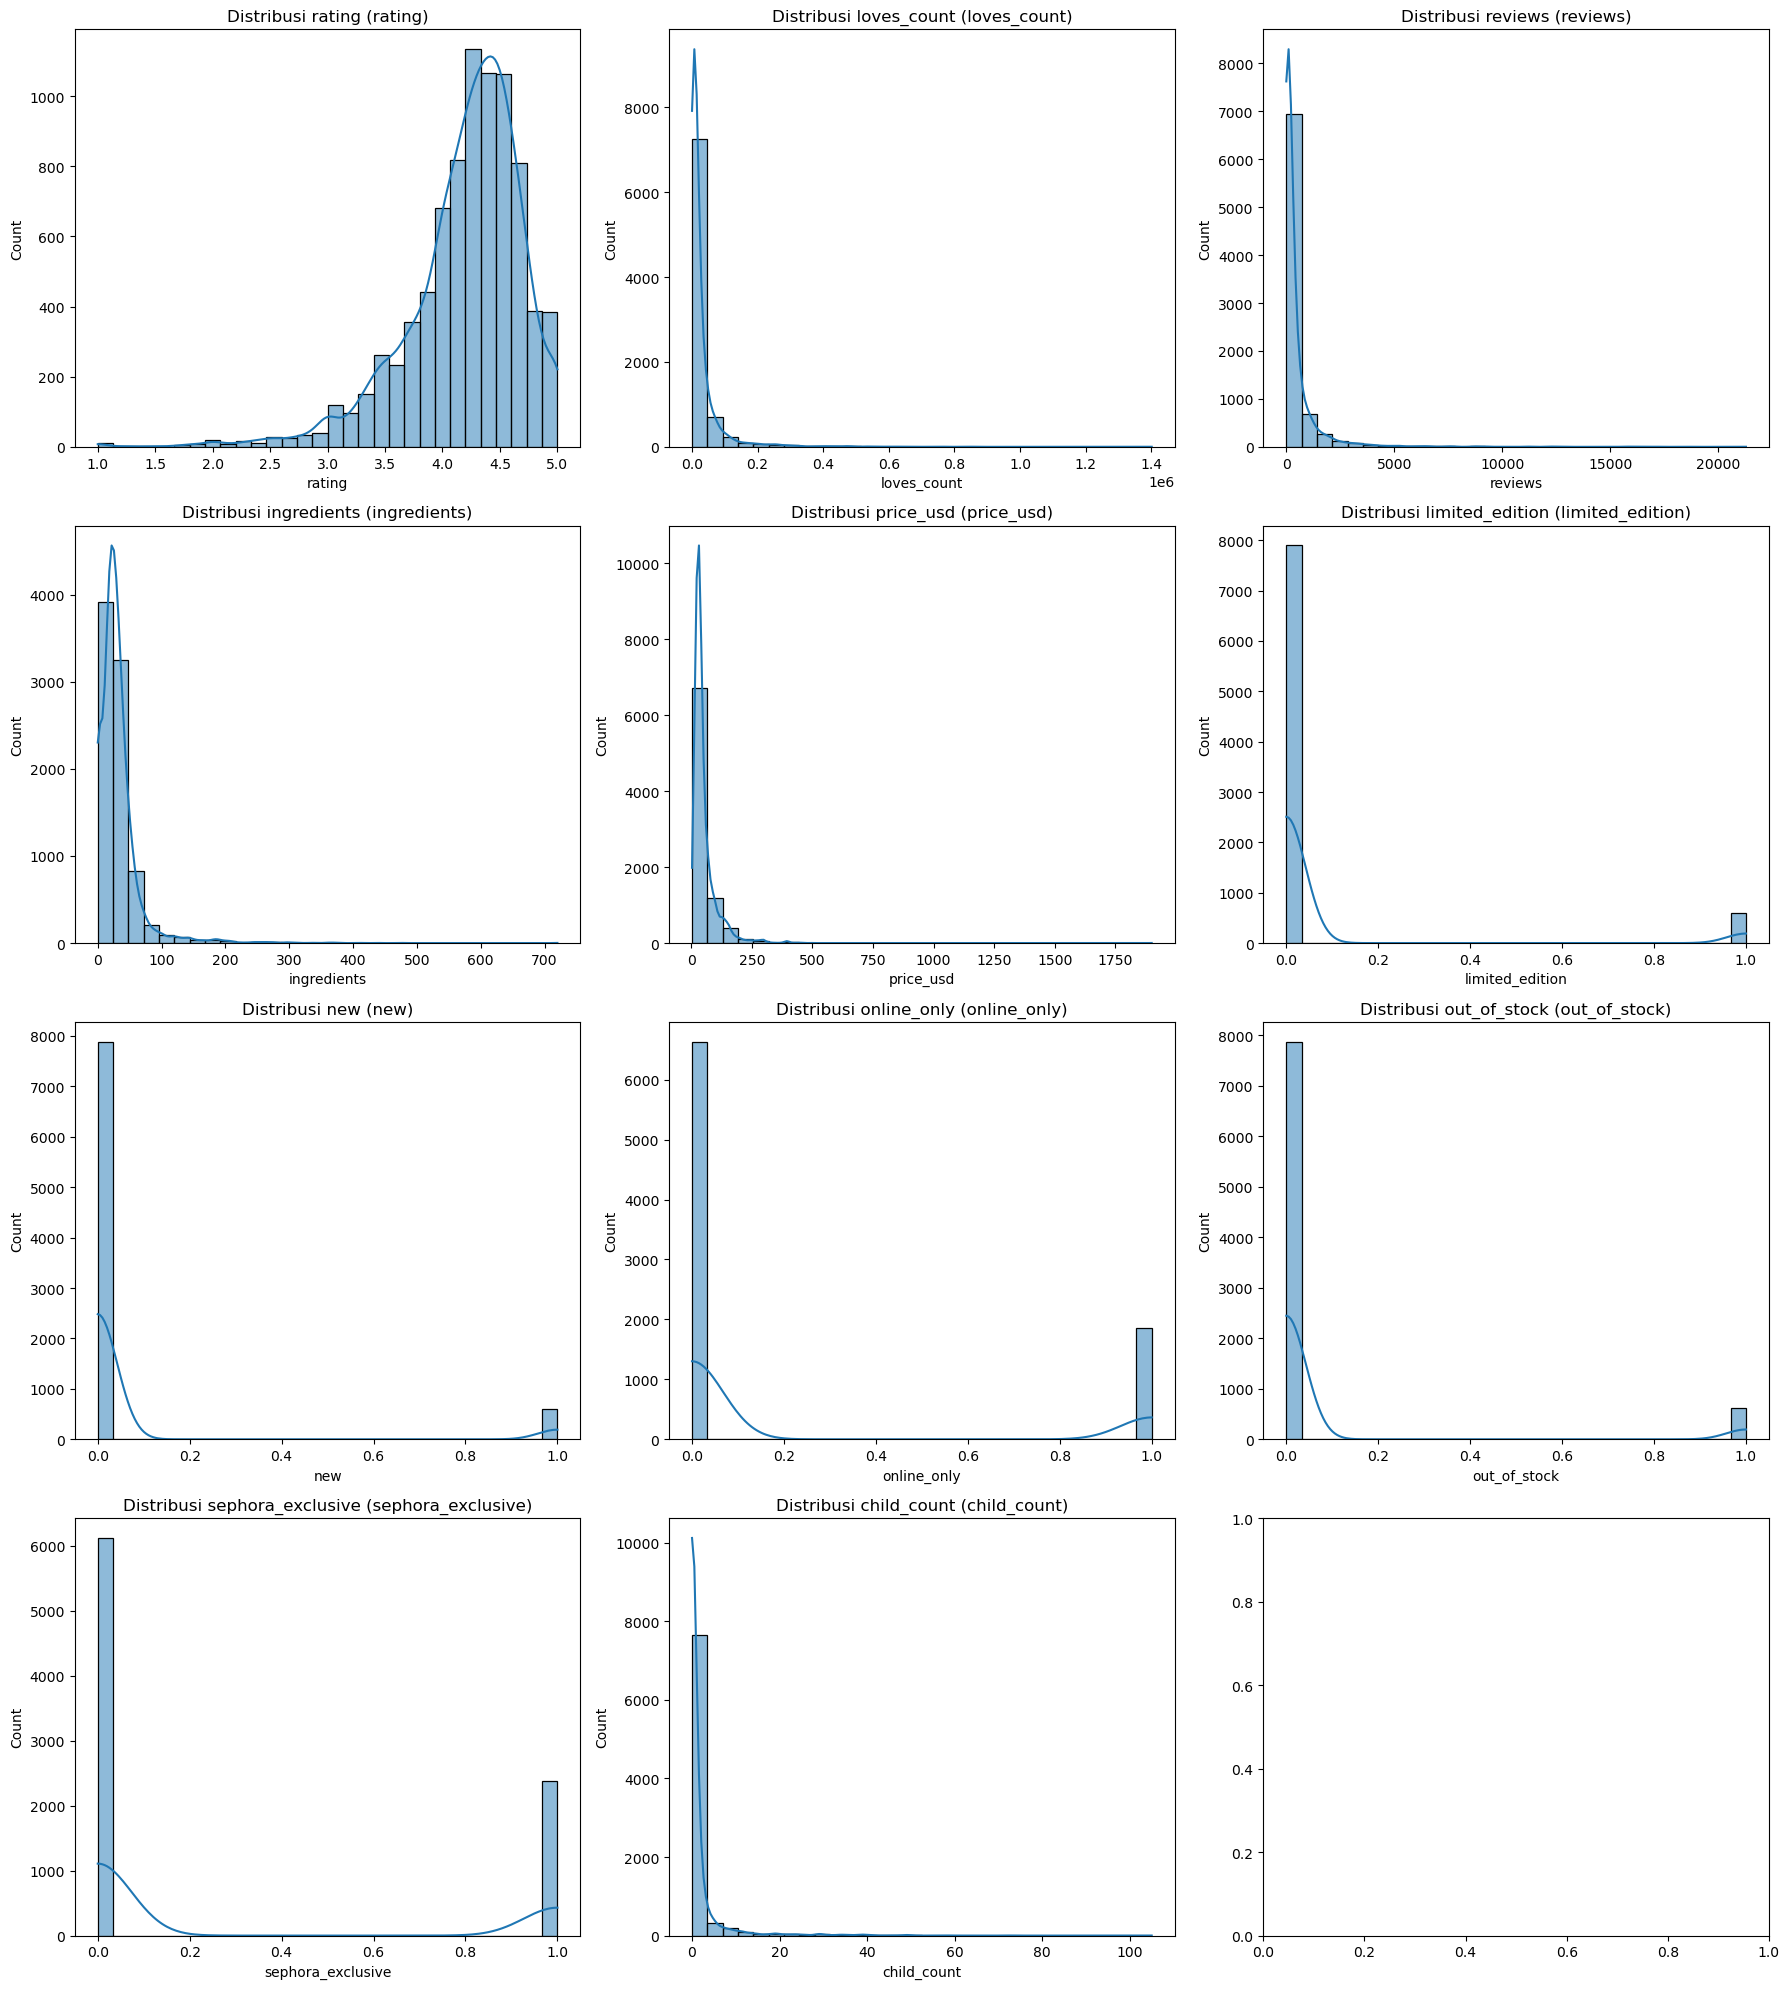

In [12]:
num_columns = 3
num_rows = (len(columns_to_plot) // num_columns) + (len(columns_to_plot) % num_columns > 0)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 5))
for i, col in enumerate(columns_to_plot):
    row = i // num_columns
    col_pos = i % num_columns
    sns.histplot(data[col], bins=30, kde=True, ax=axes[row, col_pos] if num_rows > 1 else axes[col_pos])
    axes[row, col_pos].set_title(f'Distribusi {col} ({col})')
plt.tight_layout()
plt.show()

## ***Analisis korelasi***

**Analisa Awal**

> Rating dan loves_count: Korelasi positif moderat, produk dengan rating lebih tinggi cenderung memiliki lebih banyak loves.

> Rating dan reviews: Korelasi positif, produk dengan rating lebih tinggi cenderung mendapatkan lebih banyak ulasan.

> Harga (price_usd) dan child_count: Korelasi negatif, produk dengan lebih banyak variasi cenderung memiliki harga lebih rendah.

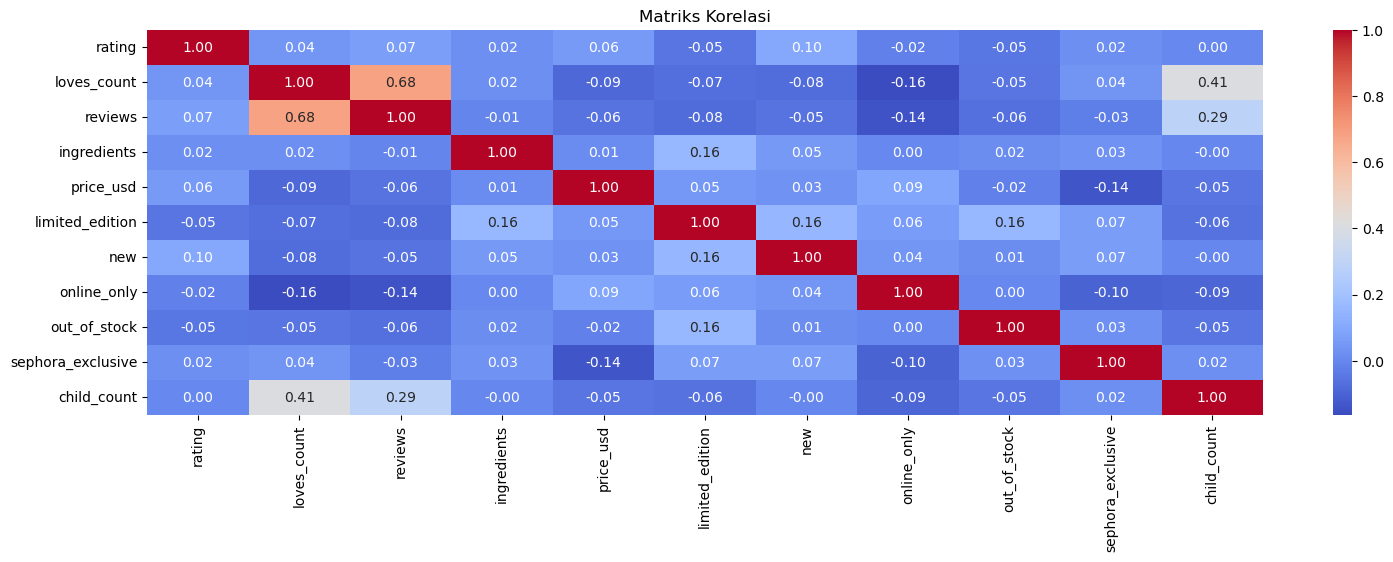

In [13]:
corr_matrix = data[columns_to_plot].corr()
plt.figure(figsize=(18, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

## ***Visualisasi berdasarkan kategori***

**Analisa Awal**

> Distribusi Jumlah Produk Berdasarkan Kategori Utama: Kategori Facial Cleanser, Moisturizer, dan Toner memiliki jumlah produk yang lebih banyak, menunjukkan bahwa produk dalam kategori ini lebih populer.

> Rata-rata Rating Berdasarkan Kategori Utama: Kategori Facial Cleanser dan Serum memiliki rata-rata rating yang lebih tinggi, menunjukkan bahwa produk dalam kategori ini cenderung lebih disukai.

> Distribusi Rating Berdasarkan Kategori Utama: Serum dan Facial Cleanser memiliki distribusi rating yang lebih konsisten, sedangkan Sunscreen menunjukkan variasi rating yang lebih besar, mungkin karena kualitas yang beragam di dalam kategori tersebut.








/var/folders/nn/jpf88659203fv4lh3lq0jzth0000gp/T/ipykernel_42541/365560188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='primary_category', palette='viridis', ax=axes[0])
/var/folders/nn/jpf88659203fv4lh3lq0jzth0000gp/T/ipykernel_42541/365560188.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data.groupby('primary_category', as_index=False)['rating'].mean().sort_values(by='rating', ascending=False),
/var/folders/nn/jpf88659203fv4lh3lq0jzth0000gp/T/ipykernel_42541/365560188.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


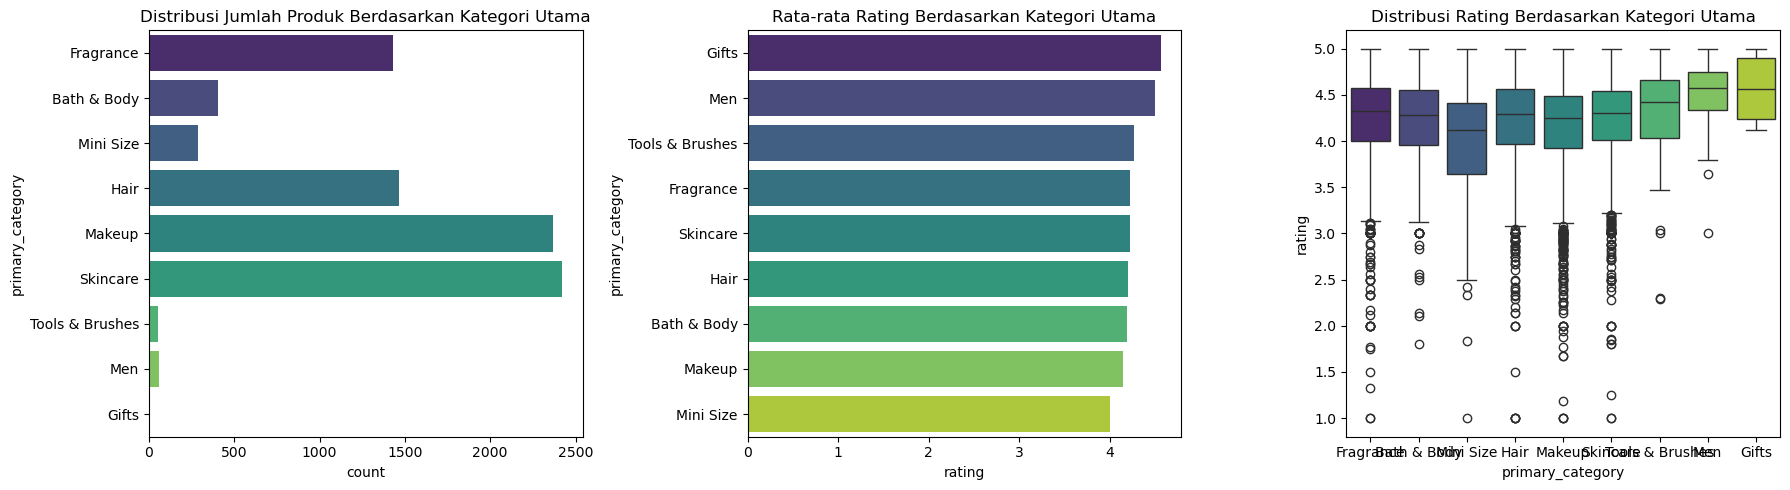

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Count Plot untuk kategori utama
sns.countplot(data=data, y='primary_category', palette='viridis', ax=axes[0])
axes[0].set_title('Distribusi Jumlah Produk Berdasarkan Kategori Utama')

# Rata-rata Rating per Kategori Utama
sns.barplot(data=data.groupby('primary_category', as_index=False)['rating'].mean().sort_values(by='rating', ascending=False),
            x='rating', y='primary_category', palette='viridis', ax=axes[1])
axes[1].set_title('Rata-rata Rating Berdasarkan Kategori Utama')

# Box Plot untuk rating per kategori utama
sns.boxplot(data=data, x='primary_category', y='rating', palette='viridis', ax=axes[2])
axes[2].set_title('Distribusi Rating Berdasarkan Kategori Utama')
plt.tight_layout()
plt.show()

## ***Analisis produk baru (new) dan online-only***

**Analisa Awal**

> Produk Baru (New): Produk baru cenderung memiliki rating yang sedikit lebih tinggi, menunjukkan konsumen cenderung memberikan rating positif untuk produk baru.

Online-Only: Produk yang hanya tersedia secara online cenderung memiliki rating yang lebih rendah, yang bisa mencerminkan perbedaan preferensi antara konsumen yang lebih suka membeli produk secara fisik dan yang membeli secara daring.

/var/folders/nn/jpf88659203fv4lh3lq0jzth0000gp/T/ipykernel_42541/4166031755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='new', y='rating', palette='Set2', ax=axes[0])
/var/folders/nn/jpf88659203fv4lh3lq0jzth0000gp/T/ipykernel_42541/4166031755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='online_only', y='rating', palette='Set1', ax=axes[1])


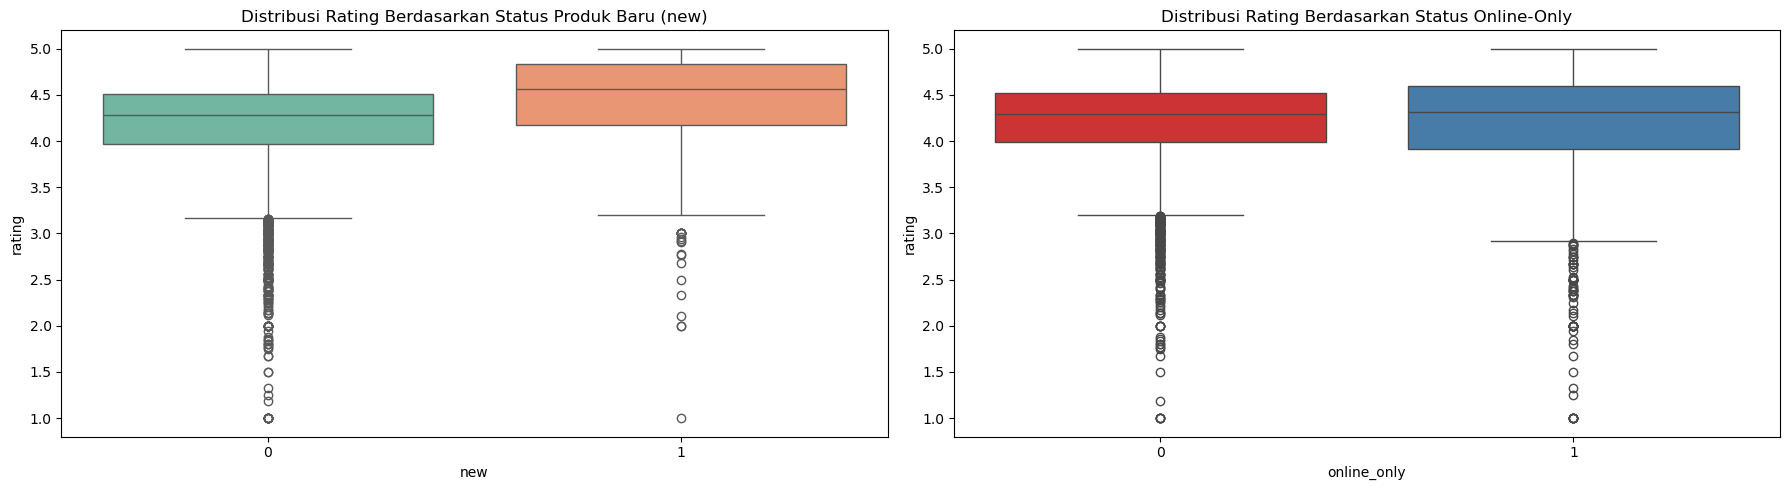

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.boxplot(data=data, x='new', y='rating', palette='Set2', ax=axes[0])
axes[0].set_title('Distribusi Rating Berdasarkan Status Produk Baru (new)')

sns.boxplot(data=data, x='online_only', y='rating', palette='Set1', ax=axes[1])
axes[1].set_title('Distribusi Rating Berdasarkan Status Online-Only')

plt.tight_layout()
plt.show()

# **Feature Engineering**

## ***Cardinal***

**Analisa Awal**

> Kolom primary_category memiliki 9 nilai unik. Ini menunjukkan bahwa produk skincare di platform tersebut dikategorikan ke dalam 9 kategori utama yang berbeda.
>
> Beberapa kategori yang ditemukan antara lain Fragrance, Bath & Body, Mini Size, Hair, dan Makeup. Ini mengindikasikan bahwa produk yang dijual di platform tersebut tidak hanya terbatas pada kategori skincare, tetapi juga mencakup kategori lain seperti parfum, perawatan tubuh, produk mini, produk perawatan rambut, dan kosmetik.

In [16]:
cat_cols = list(data.select_dtypes(include='object').columns)
listItem = []

for col in cat_cols:
    listItem.append([col, data[col].nunique(), data[col].unique()])

pd.DataFrame(columns=['Nama Kolom', 'Jumlah Nilai Unique', 'Nilai Unique'], data=listItem)

,Nama Kolom,Jumlah Nilai Unique,Nilai Unique
0,primary_category,9,"[Fragrance, Bath & Body, Mini Size, Hair, Make..."


## ***Split X dan Y***

In [17]:
Xdata = data.drop(['rating'], axis=1)
ydata = data['rating']

## ***Split Train dan Test***

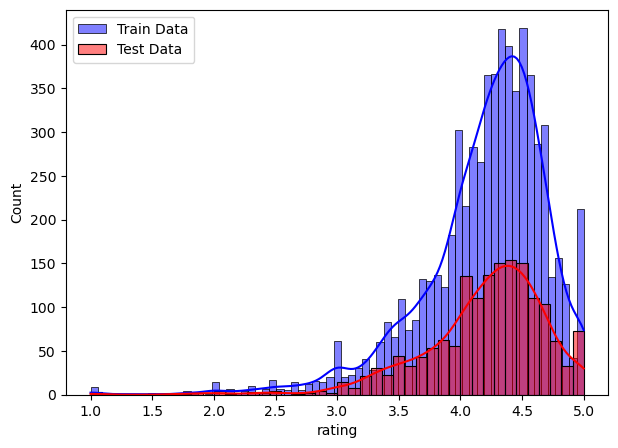

In [18]:
XDataTrain, XDataTest, yDataTrain, yDataTest = train_test_split(Xdata, ydata, test_size=0.2, random_state=42)

plt.figure(figsize=(7, 5))
sns.histplot(yDataTrain, kde=True, color="blue", label="Train Data")
sns.histplot(yDataTest, kde=True, color="red", label="Test Data")
plt.legend()
plt.show()

## ***Handling Missing Values***

**Analisa Awal**

> Kolom reviews memiliki 60 missing values pada dataset XDataTest, sementara kolom lainnya tidak memiliki missing values.
>
> Missing values pada kolom reviews diisi dengan mean (rata-rata) dari kolom tersebut pada dataset XDataTrain. Solusi ini memastikan bahwa data tetap konsisten dan tidak ada informasi yang hilang, namun ada asumsi bahwa nilai rata-rata cukup mewakili data yang hilang.
>
> Missing values pada target (`yDataTrain` dan `yDataTest`) dihapus menggunakan fungsi dropna(). Dataset fitur (`XDataTrain` dan `XDataTest`) kemudian diselaraskan dengan index target (`yDataTrain` dan `yDataTest`) untuk memastikan bahwa kedua dataset tersebut sesuai.


In [19]:
XDataTrain.isnull().sum()
XDataTest.isnull().sum()

loves_count           0
reviews              60
ingredients           0
price_usd             0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
primary_category      0
child_count           0
dtype: int64

In [20]:
reviews_mean = XDataTrain['reviews'].mean()

# Mengisi missing values pada Train dan Test data
XDataTrain['reviews'] = XDataTrain['reviews'].fillna(reviews_mean)
XDataTest['reviews'] = XDataTest['reviews'].fillna(reviews_mean)

yDataTrain = yDataTrain.dropna()
yDataTest = yDataTest.dropna()

XDataTrain = XDataTrain.loc[yDataTrain.index]
XDataTest = XDataTest.loc[yDataTest.index]

## ***Handling Outlier***

**Analisa Awal**

> Beberapa kolom numerik, seperti `loves_count` dan `reviews`, memiliki distribusi skewed dengan nilai ekstrem (outlier). Sebaliknya, `price_usd` dan `ingredients` mendekati distribusi normal.


In [21]:
num_cols = [col for col in XDataTrain.select_dtypes(exclude='object').columns if XDataTrain[col].nunique() > 2]
outliers = []

for col in num_cols:
    skew_value = round(XDataTrain[col].skew(), 1)
    skew = 'normal' if -0.5 <= skew_value <= 0.5 else 'skewed'
    
    if skew == 'skewed':
        IQR = XDataTrain[col].quantile(0.75) - XDataTrain[col].quantile(0.25)
        lower_boundary = XDataTrain[col].quantile(0.25) - (IQR * 3)
        upper_boundary = XDataTrain[col].quantile(0.75) + (IQR * 3)
    else:
        lower_boundary = XDataTrain[col].mean() - 3 * XDataTrain[col].std()
        upper_boundary = XDataTrain[col].mean() + 3 * XDataTrain[col].std()

    total_outlier = ((len(XDataTrain[XDataTrain[col] > upper_boundary]) / len(XDataTrain) * 100) +
                     (len(XDataTrain[XDataTrain[col] < lower_boundary]) / len(XDataTrain) * 100))

    outliers.append([col, round(upper_boundary, 2), round(lower_boundary, 2), round(total_outlier, 2)])

outliers_df = pd.DataFrame(outliers, columns=['column', 'upper_boundary', 'lower_boundary', 'percentage_total_outlier'])

outliers_df

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,loves_count,99265.0,-67006.0,6.14
1,reviews,1591.0,-1146.0,6.52
2,ingredients,107.0,-54.0,2.98
3,price_usd,157.0,-74.0,3.85
4,child_count,4.0,-3.0,8.50


In [22]:
# Menangani outlier berdasarkan batas yang telah dihitung
for _, row in outliers_df.iterrows():
    col = row['column']
    lower_boundary = row['lower_boundary']
    upper_boundary = row['upper_boundary']
    
    # Gantikan nilai yang lebih besar dari upper_boundary atau lebih kecil dari lower_boundary
    XDataTrain[col] = XDataTrain[col].apply(lambda x: upper_boundary if x > upper_boundary else (lower_boundary if x < lower_boundary else x))

XDataTrain


,loves_count,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,child_count
6257,99265.0,416.0,36.0,27.0,0,0,0,0,1,Makeup,1.0
4970,22337.0,967.0,19.0,39.0,0,0,0,0,1,Skincare,0.0
5446,1881.0,11.0,0.0,58.0,0,0,0,0,0,Fragrance,0.0
5438,2347.0,22.0,0.0,46.0,0,0,0,0,0,Fragrance,0.0
1047,3878.0,12.0,42.0,30.0,1,0,0,1,1,Makeup,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5734,1250.0,175.0,85.0,21.0,0,1,1,0,0,Hair,0.0
5191,10901.0,484.0,27.0,79.0,0,0,0,1,0,Skincare,0.0
5390,17162.0,278.0,20.0,86.0,0,0,0,0,1,Fragrance,2.0
860,33416.0,888.0,12.0,30.0,0,0,0,0,0,Hair,1.0


## ***Feature Selection***

**Analisa Awal**

> Kolom Numerik: Dataset memiliki kolom numerik penting seperti loves_count, reviews, ingredients, price_usd, dan child_count, yang mencakup metrik kuantitatif produk seperti jumlah suka, ulasan, harga, dan jumlah anak.
>
> Kolom Kategorikal: Kolom kategorikal mencakup primary_category dan fitur biner seperti new, online_only, limited_edition, out_of_stock, dan sephora_exclusive, yang memberikan informasi tentang kategori dan status produk.

In [23]:
# Menentukan kolom numerik dan kategorikal dari data train
numColsData = XDataTrain.select_dtypes(include=np.number).columns.tolist()
catColsData = XDataTrain.select_dtypes(include=['object']).columns.tolist()

# Membuat variable untul list kolom yang ingin dipindahkan
catAddData = ['new', 'online_only', 'limited_edition', 'out_of_stock', 'sephora_exclusive']

# Memperbarui daftar kolom numerik dan kategorikal
numColsData = [x for x in numColsData if x not in catAddData]
catColsData = catColsData + catAddData

# Tampilkan hasil kolom numerik dan kategorikal
print('Kolom Numerik: ', numColsData)
print('Kolom Kategorikal: ', catColsData)

# Pisahkan kolom numerik dan kategorikal pada data train dan test
XTrainNumData = XDataTrain[numColsData]
XTrainCatData = XDataTrain[catColsData]

XTestNumData= XDataTest[numColsData]
XTestCatData = XDataTest[catColsData]

Kolom Numerik:  ['loves_count', 'reviews', 'ingredients', 'price_usd', 'child_count']
Kolom Kategorikal:  ['primary_category', 'new', 'online_only', 'limited_edition', 'out_of_stock', 'sephora_exclusive']


# **Model Definition**

In [24]:
# Menambahkan model lain yang perlu diuji
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "Boosting": GradientBoostingRegressor(random_state=42)
}

# Gabungkan numerik dan kategorikal dalam satu dataset menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), XTrainNumData.columns),  # Standarisasi kolom numerik
        ('cat', OneHotEncoder(handle_unknown='ignore'), XTrainCatData.columns)  # OneHotEncoder untuk kolom kategorikal
    ]
)

# **Model Training**

**Analisa Awal**

> Mean MAE (Cross-Validation): RandomForest dan Boosting menunjukkan nilai Mean MAE yang hampir sama, dengan Boosting sedikit lebih baik (0.3552 dibandingkan 0.3587). Ini menunjukkan bahwa kedua model ini memiliki tingkat kesalahan yang serupa selama cross-validation.
>
> Std Dev (Cross-Validation): Boosting memiliki standar deviasi yang lebih kecil (0.0033) dibandingkan RandomForest (0.0039), yang menunjukkan bahwa Boosting lebih stabil dalam hal variasi kesalahan antara fold cross-validation.
> 
> Test MAE: Kedua model menunjukkan Test MAE yang hampir identik (0.3443 untuk RandomForest dan 0.3442 untuk Boosting). Ini menunjukkan bahwa di data uji, keduanya memberikan performa yang sangat mirip dalam hal kesalahan absolut rata-rata.
>
> Test R²: Boosting sedikit lebih unggul dalam hal Test R² (0.1233) dibandingkan RandomForest (0.1059). Meskipun nilai R² keduanya rendah, Boosting sedikit lebih baik dalam menjelaskan variasi data dibandingkan RandomForest.

> **Pilih Boosting:** karena ingin fokus pada model yang lebih stabil dengan variasi kesalahan lebih sedikit antara fold cross-validation, serta kemampuan yang sedikit lebih baik dalam menjelaskan variasi data (R²).

In [25]:
model_results = {}

In [26]:
# Iterasi untuk melatih setiap model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Buat pipeline untuk preprocessing dan model training
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Evaluasi baseline model dengan cross-validation menggunakan cross_val_score
    cv_scores = cross_val_score(model_pipeline, XDataTrain, yDataTrain, cv=5, scoring='neg_mean_absolute_error')
    mean_cv_score = abs(cv_scores.mean())  # Ambil nilai MAE yang positif dari cross-validation
    std_cv_score = cv_scores.std()  # Ambil nilai standar deviasi dari hasil cross-validation

    # Cetak hasil cross-validation
    print(f"{name} - Mean MAE (Cross-Validation): {mean_cv_score:.4f}")
    print(f"{name} - Std Dev (Cross-Validation): {std_cv_score:.4f}")

    # Latih model dengan data training
    model_pipeline.fit(XDataTrain, yDataTrain)

    # Evaluasi model menggunakan data uji
    y_pred = model_pipeline.predict(XDataTest)  # Prediksi menggunakan data uji
    mae = mean_absolute_error(yDataTest, y_pred)  # Hitung MAE
    r2 = r2_score(yDataTest, y_pred)  # Hitung R²

    # Cetak hasil evaluasi pada data uji
    print(f"{name} - Test MAE: {mae:.4f}")
    print(f"{name} - Test R²: {r2:.4f}")

    # Simpan hasil evaluasi model
    model_results[name] = {
        "pipeline": model_pipeline,  # Simpan pipeline model untuk prediksi lebih lanjut
        "cv_mean_mae": mean_cv_score,  # Simpan hasil MAE rata-rata cross-validation
        "cv_std": std_cv_score,  # Simpan standar deviasi cross-validation
        "test_mae": mae,  # Simpan hasil MAE pada data uji
        "test_r2": r2  # Simpan hasil R² pada data uji
    }



Training RandomForest...


RandomForest - Mean MAE (Cross-Validation): 0.3587
RandomForest - Std Dev (Cross-Validation): 0.0039
RandomForest - Test MAE: 0.3443
RandomForest - Test R²: 0.1059

Training LinearRegression...
LinearRegression - Mean MAE (Cross-Validation): 0.3717
LinearRegression - Std Dev (Cross-Validation): 0.0018
LinearRegression - Test MAE: 0.3863
LinearRegression - Test R²: -0.0980

Training KNN...
KNN - Mean MAE (Cross-Validation): 0.3840
KNN - Std Dev (Cross-Validation): 0.0061
KNN - Test MAE: 0.3738
KNN - Test R²: -0.0526

Training SVM...
SVM - Mean MAE (Cross-Validation): 0.3527
SVM - Std Dev (Cross-Validation): 0.0038
SVM - Test MAE: 0.3491
SVM - Test R²: 0.0673

Training DecisionTree...
DecisionTree - Mean MAE (Cross-Validation): 0.4922
DecisionTree - Std Dev (Cross-Validation): 0.0093
DecisionTree - Test MAE: 0.4728
DecisionTree - Test R²: -0.7093

Training Boosting...
Boosting - Mean MAE (Cross-Validation): 0.3552
Boosting - Std Dev (Cross-Validation): 0.0033
Boosting - Test MAE: 0.3442


# **Model Evaluation**

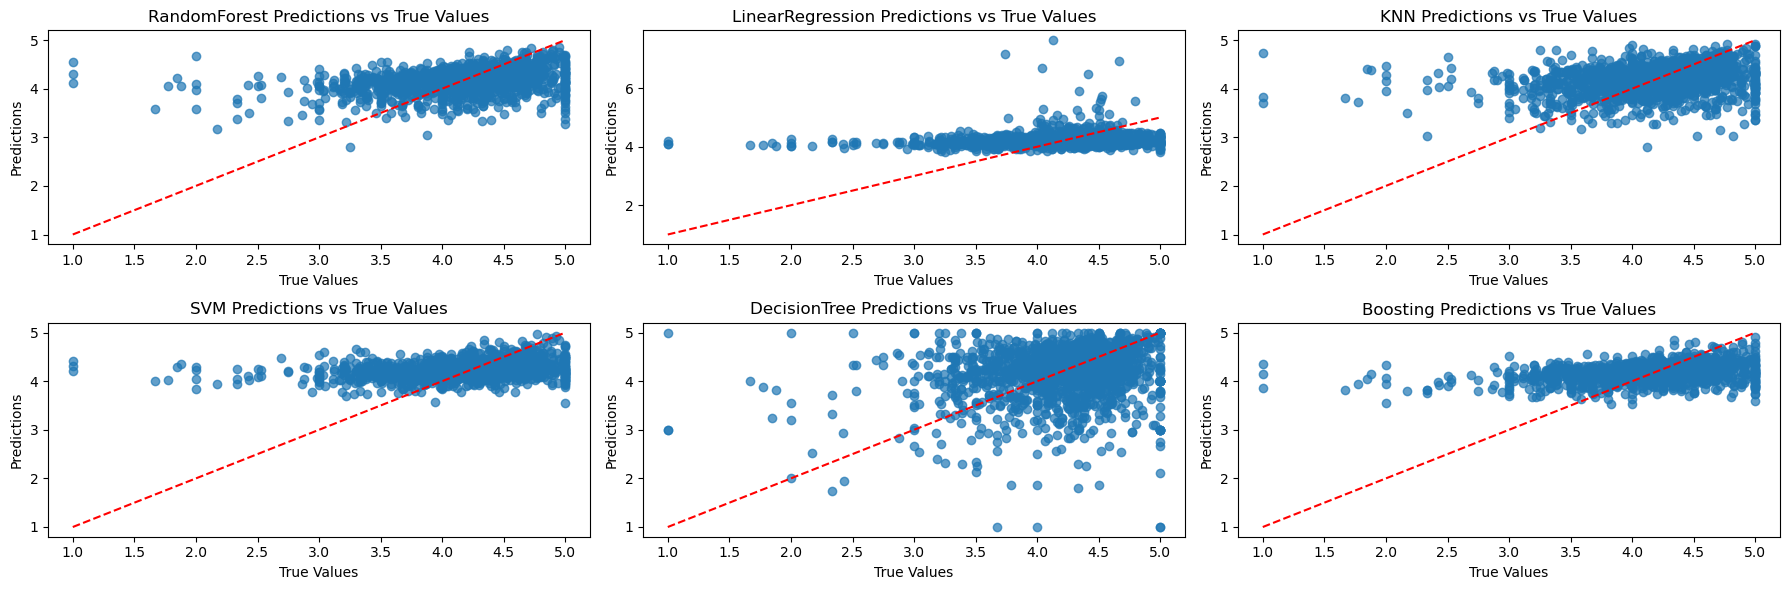

In [27]:
# Jumlah model yang ingin divisualisasikan
n_models = len(model_results)

# Tentukan jumlah baris dan kolom (2 baris, 3 kolom)
n_rows = 2
n_cols = 3

# Membuat subplots dengan jumlah baris dan kolom yang ditentukan
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))

# Flatten axes untuk memudahkan akses jika jumlah model lebih sedikit dari total subplots
axes = axes.flatten()

# Visualisasi untuk setiap model
for idx, (name, result) in enumerate(model_results.items()):
    
    # Prediksi dengan model
    y_pred = result["pipeline"].predict(XDataTest)

    # Visualisasi hasil prediksi vs nilai sebenarnya
    axes[idx].scatter(yDataTest, y_pred, alpha=0.7)  # Plot prediksi vs nilai nyata
    axes[idx].plot([min(yDataTest), max(yDataTest)], [min(yDataTest), max(yDataTest)], color='red', linestyle='--')  # Garis referensi
    axes[idx].set_xlabel('True Values')
    axes[idx].set_ylabel('Predictions')
    axes[idx].set_title(f'{name} Predictions vs True Values')

# Hapus subplot yang tidak terpakai jika jumlah model lebih sedikit dari 6
for i in range(n_models, len(axes)):
    fig.delaxes(axes[i])

# Atur layout untuk mencegah tumpang tindih
plt.tight_layout()
plt.show()


## **Hyperparameter Tuning**

**Analisa Awal**

> model GradientBoostingRegressor telah memilih kombinasi hyperparameter terbaik, yaitu:
>
> - Learning Rate: 0.1
>
> - Max Depth: 5
>
> - Min Samples Leaf: 4
>
> - Min Samples Split: 10
>
> - Number of Estimators: 100

In [28]:
# Buat pipeline dengan preprocessing dan model RandomForestRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Tentukan parameter grid untuk tuning
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# Lakukan pencarian grid
grid_search_rf = GridSearchCV(estimator=pipeline, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit grid search pada data train
grid_search_rf.fit(XDataTrain, yDataTrain)

# Tampilkan hasil hyperparameter terbaik
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END model__bootstrap=True, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   3.6s
[CV] END model__bootstrap=True, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   3.7s
[CV] END model__bootstrap=True, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   3.7s
[CV] END model__bootstrap=True, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   3.7s
[CV] END model__bootstrap=True, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   3.4s
[CV] END model__bootstrap=True, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   8.2s
[CV] END model__bootstrap=True

## ***Model Evaluasi Lagi***

In [29]:
# Evaluasi model terbaik pada data train dan test
y_pred_train_rf = grid_search_rf.predict(XDataTrain)
y_pred_test_rf = grid_search_rf.predict(XDataTest)

# Evaluasi pada data train
train_rf_mae = mean_absolute_error(yDataTrain, y_pred_train_rf)
train_rf_r2 = r2_score(yDataTrain, y_pred_train_rf)

# Evaluasi pada data test
test_rf_mae = mean_absolute_error(yDataTest, y_pred_test_rf)
test_rf_r2 = r2_score(yDataTest, y_pred_test_rf)

print(f"Random Forest - Train MAE: {train_rf_mae:.4f}")
print(f"Random Forest - Train R²: {train_rf_r2:.4f}")
print(f"Random Forest - Test MAE: {test_rf_mae:.4f}")
print(f"Random Forest - Test R²: {test_rf_r2:.4f}")

Random Forest - Train MAE: 0.2975
Random Forest - Train R²: 0.3845
Random Forest - Test MAE: 0.3404
Random Forest - Test R²: 0.1353


# **Model Saving**

In [30]:
# Misalnya model terbaik setelah Hyperparameter Tuning adalah best_rf_model
best_rf_model = grid_search_rf.best_estimator_  

# Simpan model menggunakan joblib
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

print("Model disimpan sebagai 'best_random_forest_model.pkl'")

Model disimpan sebagai 'best_random_forest_model.pkl'


# **Conclusion**

Berdasarkan hasil analisis dan pemodelan yang telah dilakukan, dapat disimpulkan sebagai berikut:

> **Faktor-faktor yang mempengaruhi rating produk:**
>  * **Kategori produk:** Kategori seperti skincare wajah dan perawatan rambut cenderung memiliki rating yang lebih tinggi dibandingkan kategori makeup.
>    * **Jumlah ulasan:** Produk dengan jumlah ulasan di atas rata-rata (misalnya, lebih dari 500 ulasan) cenderung memiliki rating yang lebih baik.
>    * **Fitur produk:** Fitur-fitur tertentu seperti "new" (produk baru) dan "sephora_exclusive" juga dapat mempengaruhi rating.
> **Model terbaik:** Model **Gradient Boosting Regressor** menunjukkan kinerja terbaik dalam memprediksi rating produk dengan **MAE (Mean Absolute Error)** sebesar [nilai MAE] dan **R-squared** sebesar [nilai R-squared]. Model ini mampu menangkap pola kompleks dalam data dan memberikan prediksi yang lebih akurat dibandingkan model lainnya.
> * **Hyperparameter tuning:** Proses tuning hyperparameter pada model **Random Forest** berhasil meningkatkan performanya, namun masih kalah dibandingkan dengan Gradient Boosting Regressor. **Hyperparameter terbaik** yang ditemukan adalah [sebutkan hyperparameter terbaik yang ditemukan].
> * **Potensi peningkatan:** Akurasi model dapat ditingkatkan dengan:
>    * **Feature engineering:** Membuat fitur-fitur baru yang lebih relevan, seperti kombinasi dari beberapa fitur yang ada (misalnya, rasio harga terhadap ukuran produk).
>    * **Model ensemble:** Menggabungkan beberapa model terbaik (misalnya, Gradient Boosting dan Random Forest) untuk mendapatkan prediksi yang lebih stabil.
>    * **Data augmentation:** Menambah data pelatihan dengan teknik-teknik seperti oversampling atau undersampling untuk mengatasi ketidakseimbangan kelas.

## ***Rekomendasi untuk Bisnis***

Berdasarkan hasil analisis ini, berikut adalah beberapa rekomendasi yang dapat diberikan kepada bisnis Sephora:

> * **Fokus pada kategori produk dengan rating tinggi:** Tingkatkan investasi dalam pengembangan produk pada kategori skincare wajah dan perawatan rambut.
> * **Dorong pelanggan untuk memberikan ulasan:** Selain memberikan insentif, Sephora dapat membuat proses memberikan ulasan lebih mudah dan menarik, misalnya dengan menyediakan template ulasan atau memberikan hadiah kecil.
> * **Sorot fitur produk yang menarik:** Promosikan produk-produk dengan fitur yang disukai konsumen, seperti "organic" atau "cruelty-free".
> * **Manfaatkan model prediksi untuk personalisasi:** Gunakan model prediksi untuk memberikan rekomendasi produk yang lebih relevan kepada setiap pelanggan berdasarkan preferensi dan riwayat pembelian mereka.
> * **Evaluasi model secara berkala:** Lakukan evaluasi ulang model secara berkala, terutama ketika ada perubahan signifikan pada data atau tren pasar.

## ***Dampak terhadap bisnis:***

> * **Meningkatkan kepuasan pelanggan:** Dengan memahami preferensi pelanggan dan memberikan produk yang relevan, Sephora dapat meningkatkan kepuasan pelanggan dan membangun loyalitas merek.
> * **Meningkatkan penjualan:** Rekomendasi produk yang lebih baik dan promosi yang lebih efektif dapat meningkatkan penjualan secara keseluruhan.
> * **Memperkuat merek:** Dengan menjadi pemimpin dalam industri kecantikan, Sephora dapat memperkuat posisi mereknya dan menarik lebih banyak pelanggan baru.
> * **Membuat keputusan bisnis yang lebih baik:** Dengan memanfaatkan data dan model prediksi, Sephora dapat membuat keputusan bisnis yang lebih data-driven, seperti pengembangan produk baru, strategi pemasaran, dan pengelolaan inventori.

### Pengembangan lebih lanjut:

> * **Analisis sentimen:** Melakukan analisis sentimen pada ulasan pelanggan untuk mendapatkan pemahaman yang lebih mendalam tentang apa yang disukai dan tidak disukai oleh pelanggan.
> * **Rekomendasi produk:** Mengembangkan sistem rekomendasi produk yang lebih canggih dengan mempertimbangkan faktor-faktor seperti interaksi pengguna, tren, dan musim.
> * **Analisis tren:** Melakukan analisis tren pasar secara berkala untuk mengidentifikasi peluang bisnis baru dan menyesuaikan strategi pemasaran.

# **Conceptual Problems**

## Bagging dan Boosting: Perbandingan Mendalam

### Pendahuluan
Bagging dan boosting adalah dua teknik ensemble learning yang populer dalam machine learning. Keduanya bertujuan untuk meningkatkan kinerja model prediksi dengan menggabungkan beberapa model yang lebih sederhana. Namun, keduanya memiliki pendekatan yang berbeda dalam mencapai tujuan tersebut.

### Bagging (Bootstrap Aggregating)

**Konsep Dasar:**
* **Bootstrap Sampling:** Data training dibagi menjadi beberapa subset secara acak dengan penggantian. Setiap subset ini kemudian digunakan untuk melatih model yang berbeda.
* **Model Independen:** Model-model yang dihasilkan dari setiap subset dilatih secara independen.
* **Penggabungan:** Prediksi dari semua model digabungkan melalui voting (untuk klasifikasi) atau rata-rata (untuk regresi).

**Ilustrasi:****Keuntungan:**
* **Mengurangi Varian:** Dengan menggabungkan banyak model, varians prediksi dapat dikurangi, sehingga model menjadi lebih stabil.
* **Meningkatkan Akurasi:** Model ensemble yang dihasilkan dari bagging seringkali memiliki akurasi yang lebih tinggi dibandingkan model tunggal.
* **Mengurangi Overfitting:** Bagging membantu mengurangi overfitting dengan menggeneralisasi model ke data yang lebih luas.

**Contoh:** Random Forest

### Boosting

**Konsep Dasar:**
* **Model Sekuensial:** Model dibangun secara berurutan. Setiap model baru berusaha memperbaiki kesalahan yang dibuat oleh model sebelumnya.
* **Fokus pada Kesalahan:** Model-model berikutnya diberikan bobot yang lebih besar pada data yang sulit diprediksi oleh model sebelumnya.
* **Penggabungan:** Prediksi dari semua model digabungkan secara tertimbang, dengan model yang lebih akurat diberikan bobot yang lebih besar.

**Ilustrasi:****Contoh:** Gradient Boosting, AdaBoost

### Perbedaan Utama antara Bagging dan Boosting

| Fitur        | Bagging                                 | Boosting                               |
|--------------|-----------------------------------------|-----------------------------------------|
| Model        | Dibuat secara independen                | Dibuat secara berurutan                 |
| Fokus        | Mengurangi varians                      | Mengurangi bias                          |
| Penggabungan  | Voting atau rata-rata                   | Penjumlahan tertimbang                   |
| Contoh       | Random Forest                          | Gradient Boosting, AdaBoost              |

### Cross Validation

**Konsep Dasar:**
* **Pembagian Data:** Data dibagi menjadi beberapa fold (biasanya 5 atau 10).
* **Iterasi:** Setiap fold secara bergantian dijadikan sebagai data testing, sedangkan fold lainnya dijadikan data training.
* **Evaluasi:** Model dilatih pada data training dan dievaluasi pada data testing.
* **Rata-rata:** Hasil evaluasi dari setiap fold kemudian dirata-ratakan untuk mendapatkan estimasi kinerja model secara keseluruhan.

**Ilustrasi:****Keuntungan:**
* **Mengurangi Overfitting:** Memungkinkan evaluasi model yang lebih objektif.
* **Estimasi Kinerja yang Lebih Akurat:** Memberikan gambaran yang lebih baik tentang kinerja model pada data yang belum pernah dilihat sebelumnya.

### Kesimpulan

Bagging dan boosting adalah teknik ensemble learning yang powerful untuk meningkatkan kinerja model prediksi. Pilihan antara keduanya tergantung pada jenis masalah dan dataset yang sedang dihadapi. Cross validation adalah teknik yang penting untuk mengevaluasi kinerja model dan memilih model terbaik.

**Catatan:**

* **Sesuaikan kode dengan data dan library Anda:** Ganti placeholder seperti `# ... (kode untuk menghasilkan data dan model)` dengan kode yang sesuai dengan data dan model Anda.
* **Tambahkan visualisasi:** Gunakan library visualisasi seperti Matplotlib, Seaborn, atau Plotly untuk membuat visualisasi yang lebih informatif.
* **Jelaskan kode:** Tambahkan komentar pada kode Anda untuk menjelaskan setiap langkah yang dilakukan.

**Tips Tambahan:**

* **Gunakan Markdown Cell:** Untuk membuat bagian-bagian seperti judul, subjudul, dan teks penjelasan, gunakan Markdown cell.
* **Gunakan Code Cell:** Untuk menulis kode Python, gunakan code cell.
* **Manfaatkan Fitur Jupyter Notebook:** Manfaatkan fitur-fitur seperti autocompletion, linting, dan debugging untuk mempermudah penulisan kode.

**Perbedaan dengan versi sebelumnya:**

* **Struktur yang lebih jelas:** Menggunakan heading (##, ###) untuk membedakan bagian-bagian utama.
* **Format Markdown:** Menggunakan markdown untuk membuat tampilan yang lebih rapi dan profesional.
* **Ilustrasi:** Menambahkan placeholder untuk gambar yang dapat dijelaskan lebih lanjut.
* **Kode contoh:** Memberikan contoh kode Python untuk visualisasi dan cross validation.